This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 10 embryo particles with calculated initial status according to the hypothesis.

After that we, considering the collision and merger, integrate the system for 3000 time units and plot the figure.

In [1]:
import rebound
import numpy as np
sim = rebound.Simulation()

# Collision and Boundary Options
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "mercurius"
sim.dt = 0.0001*2.*np.pi

# Simulation Time
tmax = 1e3*2.*np.pi

np.random.seed(42)

In [2]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [3]:
# Embryos
n_embryos = 10
e = np.random.random(n_embryos)*0.01
inc = np.random.random(n_embryos)*0.01
Omega = np.random.random(n_embryos)*2.*np.pi
omega = np.random.random(n_embryos)*2.*np.pi 
m = 3*3.040432648022642e-06
r = 0.00012123


for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i/(n_embryos-1) + 1.5*a_saturn
    sim.add(m = m, r = r, a = a, e = e[i], inc = inc[i], Omega = Omega[i], omega = omega[i], f = rand)
    sim.particles[i+3].lastcollision = 0

In [4]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	13
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7f5c44bd97b8, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7f5c44bd9ea0, m=0.0009547919152112404 x=3.5 y=0.0 z=0.0 vx=0.0 vy=0.534777601816256 vz=0.0>
<rebound.particle.Particle object at 0x7f5c44bd97b8, m=0.0002858856727222417 x=4.58333858405018 y=0.0 z=0.0 vx=0.0 vy=0.46806920322445394 vz=0.0>
<rebound.particle.Particle object at 0x7f5c44bd9ea0, m=9.121297944067926e-06 x=-3.7185739310589163 y=5.751490009265596 z=-0.0013987422198273739 vx=-0.32187946100004133 vy=-0.20654286938288327 vz=-1.0283081450481776e-05>
<rebound.particle.Particle object at 0x7f5c44bd97b8, m=9.121297944067926e-06 x=2.399749303086452 y=-6.627646900640841 z=-0.05898686

In [5]:
for i in range(0, 3+n_embryos):
    print(sim.particles[i].m)

1.0
0.0009547919152112404
0.0002858856727222417
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06


In [6]:
sim.move_to_com()
E0 = sim.calculate_energy()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xnoavi1i because the default path (/home/fowdef/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


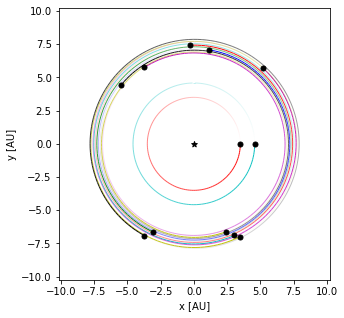

In [7]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [8]:
sim.getWidget(size=(500,300),scale=2.0*a_saturn)

Widget(N=13, count=2, height=300.0, orbit_data=b"\xf1\xf0\x97\xbb\xf1\x96\x0c8J\xe5\xe84\x00\x00`@M\xc9_%\xdb\…

In [9]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

8.929438513423043e-13


In [14]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	13
Selected integrator: 	ias15
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.974066
---------------------------------
<rebound.particle.Particle object at 0x7f7c823b11e0, m=1.0 x=-0.0012278379670424844 y=0.0032782869972884476 z=2.9366231027153372e-06 vx=-0.0005033878084595362 vy=-0.00010786443851334938 vz=7.570805556437895e-08>
<rebound.particle.Particle object at 0x7f7c823b1400, m=0.0009547919152112404 x=-0.21020072173136212 y=-3.4633317726270043 z=1.5716539159808027e-06 vx=0.5366519090933421 vy=-0.029860881070219433 vz=1.0411886848315361e-05>
<rebound.particle.Particle object at 0x7f7c823b11e0, m=0.0002858856727222417 x=4.6467049747061155 y=0.4318033778027961 z=0.00018779597111417653 vx=-0.04843337360266156 vy=0.4585161465384139 vz=-1.2179768793492463e-05>
<rebound.particle.Particle object at 0x7f7c823b1400, m=9.121297944067926e-06 x=4

Oops, it seems that something went wrong. We need to optimize our code.